In [ ]:
pip install pandas wordcloud matplotlib

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Leggi il file CSV
df = pd.read_csv('/content/artisti_df.csv')

# Pulire i nomi per rimuovere eventuali spazi extra
df['name'] = df['name'].str.strip()

# Unire nome e cognome con un underscore per mantenere l'integrità del nome completo
df['name'] = df['name'].apply(lambda x: '_'.join(x.split()))

print(df['name'])

0            Karylin_Granger
1             Daven_Peniello
2              Webb_Goligher
3           Margaux_Slograve
4             Saleem_Winning
                ...         
10507       Sharla_Samsworth
10508         Briano_Pinxton
10509         Mignon_Ianizzi
10510    Carleton_Lambillion
10511            Phip_Tofful
Name: name, Length: 10512, dtype: object


In [ ]:
# Contare le ricorrenze di ciascun nome
name_counts = df['name'].value_counts()
# Incrementare manualmente il conteggio per i nomi specificati
names_to_emphasize = {
    "Taylor_Swift": 2,
    "Antonio_Vivaldi": 1,
    "Ludovico_Einaudi": 1,
    "David_Guetta": 1,
    "Twenty_One_Pilots": 2,
    "Elthon_John": 1,
    "John_Legend": 2
}
# Unire i nomi specificati al conteggio esistente
for name, count in names_to_emphasize.items():
    if name in name_counts:
        name_counts[name] += count
    else:
        name_counts[name] = count
# Creare un dizionario da passare a WordCloud
name_dict = name_counts.to_dict()
print(name_dict)

{'Karylin_Granger': 1, 'punctual': 1, 'Falamansa': 1, 'Bryant_Myers': 1, 'Notion': 1, 'The_Apples_in_Stereo': 1, 'Nebulossa': 1, 'schafter': 1, 'Toco': 1, 'Voxtrot': 1, 'Michel_Teló': 1, 'LIEU': 1, 'Kira': 1, 'Lovelyz': 1, 'Jodeci': 1, 'Tarcísio_do_Acordeon': 1, 'Algernon_Cadwallader': 1, 'Sash!': 1, 'August_Alsina': 1, 'Weiss': 1, 'Dark_Tranquillity': 1, 'Exodia': 1, 'Parra_for_Cuva': 1, 'Deko': 1, 'Himalayas': 1, 'Omega': 1, 'The_Chameleons': 1, 'whitewoods': 1, 'Egg': 1, 'Guy_Mitchell': 1, 'bCalm': 1, 'Balthazar': 1, 'Gigi_Masin': 1, 'Kitty_Kallen': 1, 'Maro': 1, 'The_City_of_Prague_Philharmonic_Orchestra': 1, 'Traitrs': 1, 'Sybyr': 1, 'Luke_Faulkner': 1, 'Frank_Turner': 1, 'Cursive': 1, 'Twin_Shadow': 1, 'Visage': 1, 'SoYou': 1, 'Witt_Lowry': 1, 'Royal_Republic': 1, 'EVNNE': 1, 'Susannah_Joffe': 1, 'Bang_Yedam': 1, '百景': 1, 'Hopsin': 1, 'Grady': 1, 'Ahadadream': 1, 'oso_oso': 1, 'Mirage_Amuro': 1, 'Kaneko_Ayano': 1, '9lokknine': 1, 'Einstürzende_Neubauten': 1, 'nascar_aloe': 1, 'Po

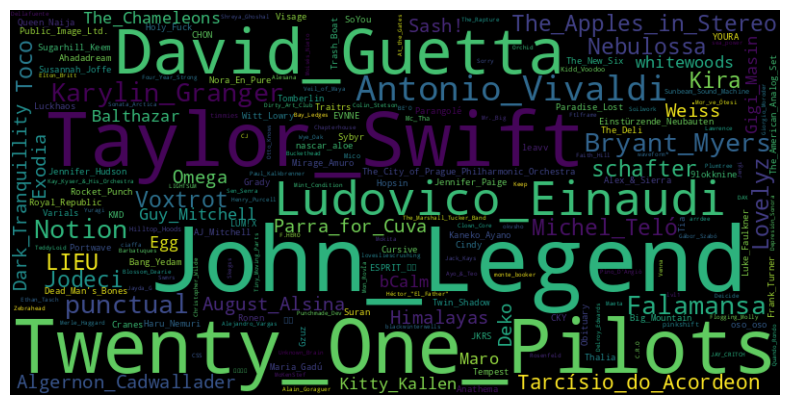

In [ ]:
# Creare la word cloud con il dizionario delle ricorrenze
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(name_dict)

# Visualizzare la word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
from collections import Counter

# Leggi il file CSV
df = pd.read_csv('/content/artisti_df.csv')

# Crea un nuovo DataFrame con i dati delle prime 4 colonne
new_df = pd.DataFrame()
new_df['merged_data'] = df.iloc[:, 0:4].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Conta le parole uniche
word_counts = Counter(new_df['merged_data'].str.split().sum())

# Converte il conteggio delle parole in un DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['occurrences'])
word_counts_df.index.name = 'word'

# Stampa il DataFrame con il conteggio delle parole
print("Conteggio delle parole uniche:")
print(word_counts_df)


Conteggio delle parole uniche:
            occurrences
word                   
rock               3634
electronic         1818
indie              3752
pop                3460
trap                884
...                 ...
otacore               1
andre                 1
rieu                  1
beautiful             1
neotrance             1

[2177 rows x 1 columns]


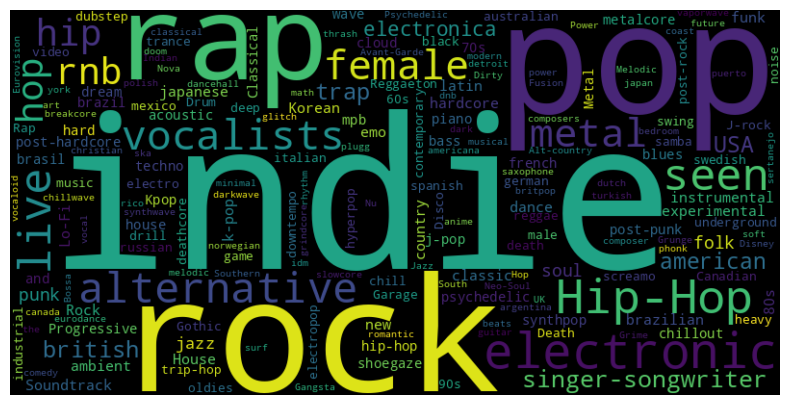

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Creare la word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_counts)

# Visualizzare la word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
